In [1]:
import cv2
import numpy as np

cap = cv2.VideoCapture("/Users/sanniekwan/Downloads/rain_moving_light_source.mp4")
subtractor = cv2.createBackgroundSubtractorKNN(history=100, dist2Threshold = 100.0, detectShadows=False)

while True:
    _, frame = cap.read()
    mask = subtractor.apply(frame)
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    
    key=cv2.waitKey(30)
    if key==27:
        break

cap.release()

cv2.destroyAllWindows()
    

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/highgui/src/window.cpp:356: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [7]:
import cv2
import cv2 as cv
import numpy as np

capture = cv2.VideoCapture('/Users/sanniekwan/Downloads/rain_moving_light_source.mp4')
size = (int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)),
int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*"DIB ")
video = cv2.VideoWriter('/Users/sanniekwan/Downloads/output.mp4', fourcc, 30,size, True)
fgbg= cv2.createBackgroundSubtractorMOG2()

while True:
    ret, img = capture.read()
    if ret==True:
        fgmask = fgbg.apply(img)
        video.write(fgmask)
        cv2.imshow('forehead',fgmask)

    if(cv2.waitKey(27)!=-1):
        break

capture.release()
video.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/Users/sanniekwan/Documents/FYP/graph/a_to_b_6.jpg')
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
cv2.imwrite('/Users/sanniekwan/Documents/FYP/trytry1.png', dst)

TypeError: Required argument 'imgToDenoiseIndex' (pos 2) not found

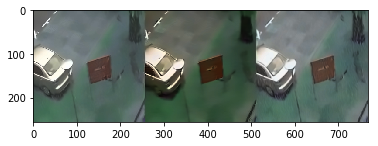

In [7]:
plt.imshow(dst)

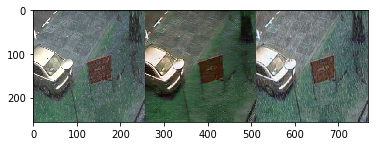

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
cap = cv2.VideoCapture('vtest.avi')
# create a list of first 5 frames
img = [cap.read()[1] for i in xrange(5)]
# convert all to grayscale
gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]
# convert all to float64
gray = [np.float64(i) for i in gray]
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
# Add this noise to images
noisy = [i+noise for i in gray]
# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]
# Denoise 3rd frame considering all the 5 frames
dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)
plt.subplot(131),plt.imshow(gray[2],'gray')
plt.subplot(132),plt.imshow(noisy[2],'gray')
plt.subplot(133),plt.imshow(dst,'gray')
plt.show()